<a href="https://colab.research.google.com/github/MohHasan1/SEA600--Assignment-1/blob/main/Milestyone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install imbalanced-learn ucimlrepo --quiet

In [2]:
# Import necessary libraries
import time
import tracemalloc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

In [3]:
# Import imbalanced-learn methods
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# **Data Import**

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset #
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes) #
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets

# **Spliting Dataset**

In [13]:
from sklearn.model_selection import train_test_split

# Split into train_val (80%) and test (20%) sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train_val (80%) to train (60%) and val (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Display shapes to verify the split
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (179, 12)
Validation set shape: (60, 12)
Test set shape: (60, 12)


# **Data Exploration (Imbalced Data)**

In [34]:
# Data is imbalnced (entire)
count_0_1 = y['death_event'].value_counts().loc[[0, 1]]
print(count_0_1)

death_event
0    203
1     96
Name: count, dtype: int64


In [8]:
# Combine X and y into one DataFrame for easier plotting
df = X.copy()
df['target'] = y

In [6]:
# Create a pairplot. The 'hue' parameter colors the points by the target variable.
# sns.pairplot(df, hue='target', diag_kind='hist')
# plt.suptitle('Scatter Plot Matrix of Heart Failure Clinical Records Features', y=1.02)
# plt.show()

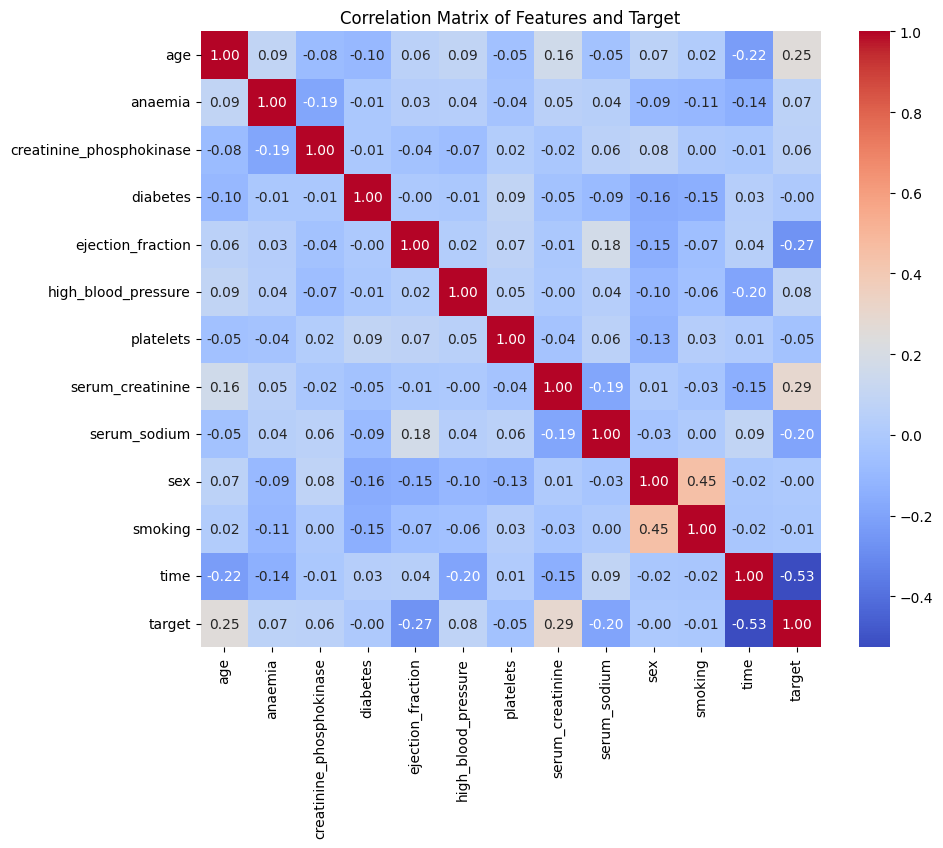

In [9]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target')
plt.show()

In [36]:
# Data is imbalnced (val and train)
count_0_1 = y_train_val['death_event'].value_counts().loc[[0, 1]]
print(count_0_1)

death_event
0    168
1     71
Name: count, dtype: int64


In [39]:
# Combine X and y into one DataFrame for easier plotting
df_ib = X_train_val.copy()
df_ib['target'] = y_train_val

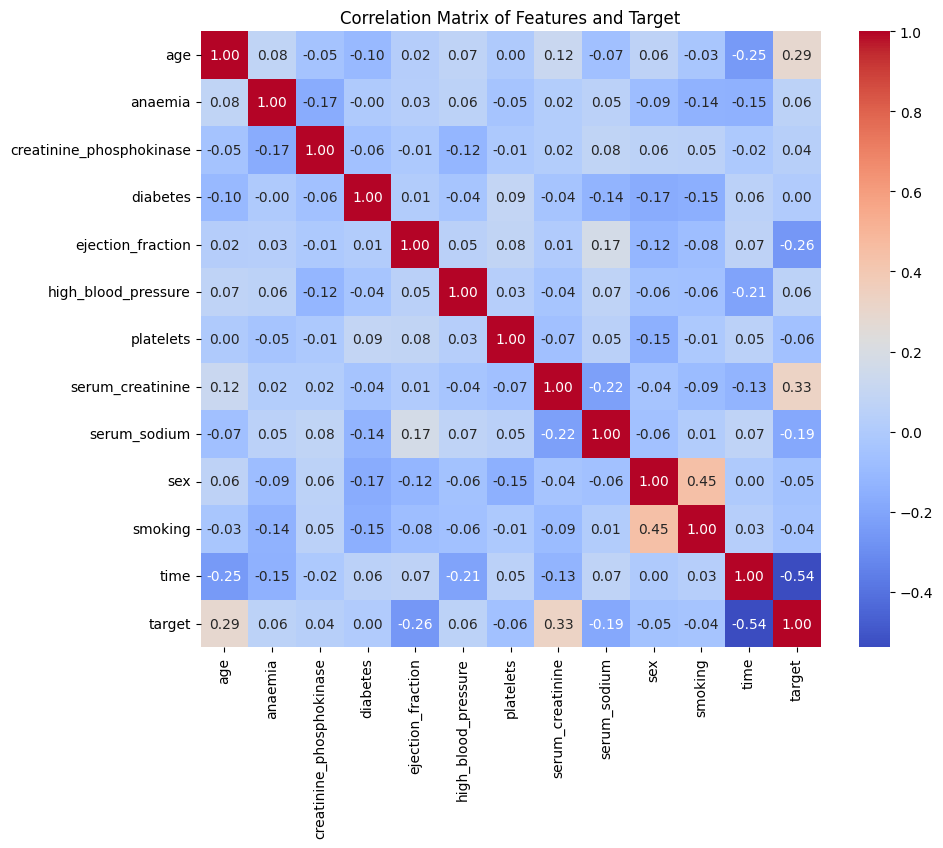

In [40]:
# Compute the correlation matrix
corr_matrix = df_ib.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target')
plt.show()

# **Sampling Dataset (train and val)**

In [23]:
# Before sampling  (train and validation)
count_0_1 = y_train_val['death_event'].value_counts().loc[[0, 1]]
count_0_1

,count
death_event,
0,168
1,71


In [24]:
# Apply Random Undersampling
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_bal, y_train_bal = under_sampler.fit_resample(X_train_val, y_train_val)
print("After Undersampling:", Counter(y_train_bal['death_event']))

After Undersampling: Counter({0: 71, 1: 71})


In [25]:
# Apply SMOTETomek (Best of both)
smote_tomek = SMOTETomek(sampling_strategy='auto', random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train_val, y_train_val)
print("After SMOTETomek:", Counter(y_train_bal['death_event']))

After SMOTETomek: Counter({1: 128, 0: 128})


In [27]:
# Apply SMOTE (Oversampling)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_val_bal, y_train_val_bal = smote.fit_resample(X_train_val, y_train_val)
print("After SMOTE:", Counter(y_train_val_bal['death_event']))

After SMOTE: Counter({1: 168, 0: 168})


In [32]:
# After sampling  (train and validation)
count_0_1 = y_train_val_bal['death_event'].value_counts().loc[[0, 1]]
count_0_1

,count
death_event,
0,168
1,168


In [30]:
# Combine X and y into one DataFrame for easier plotting
df_bal = X_train_val_bal.copy()
df_bal['target'] = y_train_val_bal

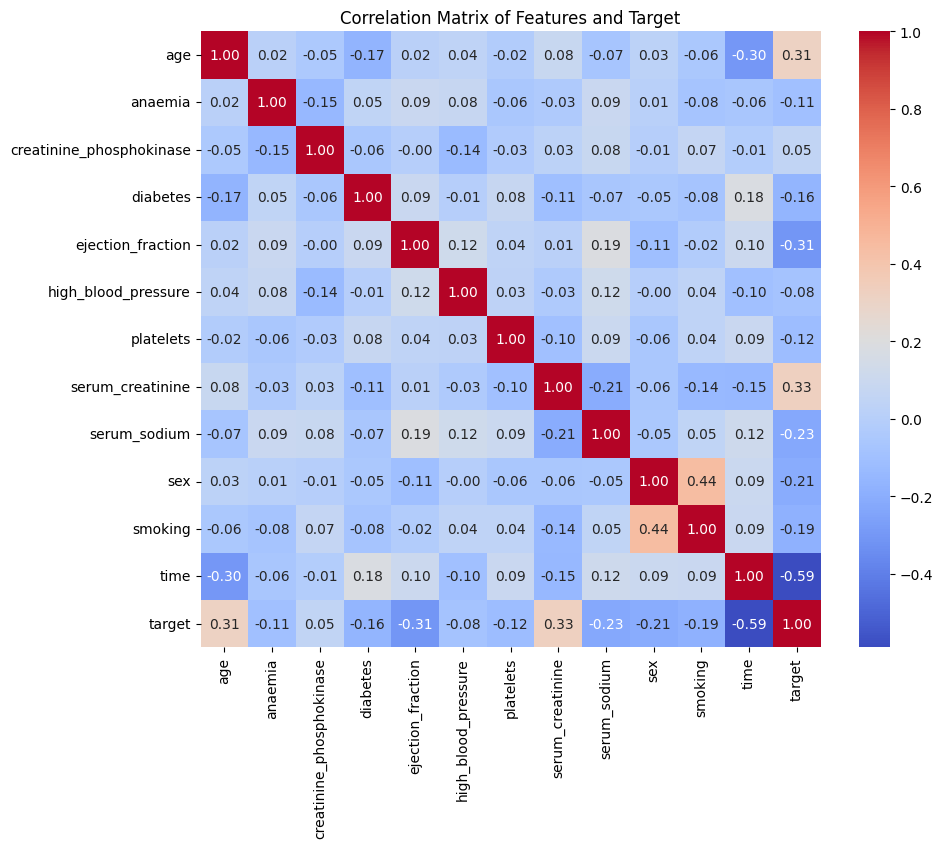

In [31]:
# Compute the correlation matrix
corr_matrix = df_bal.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target')
plt.show()

# **Modelling**

In [43]:
# spliting sample
from sklearn.model_selection import train_test_split

# Split train_val (80%) to train (60%) and val (20%) sets
X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(X_train_val_bal, y_train_val_bal, test_size=0.25, random_state=42)

# Display shapes to verify the split
print("Train set shape:", X_train_bal.shape)
print("Validation set shape:", X_val_bal.shape)

print("Test set shape:", X_test.shape)

Train set shape: (252, 12)
Validation set shape: (84, 12)
Test set shape: (60, 12)


In [49]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training set only
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test sets using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print the new shapes
print("Train set shape (standardized):", X_train_scaled.shape)
print("Validation set shape (standardized):", X_val_scaled.shape)
print("Test set shape (standardized):", X_test_scaled.shape)


Train set shape (standardized): (179, 12)
Validation set shape (standardized): (60, 12)
Test set shape (standardized): (60, 12)


In [48]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on the training set only
X_train_bal_scaled = scaler.fit_transform(X_train_bal)

# Transform validation and test sets using the same scaler
X_val_bal_scaled = scaler.transform(X_val_bal)

X_test_scaled = scaler.transform(X_test)

# Print the new shapes
print("Train set shape (standardized):", X_train_bal_scaled.shape)
print("Validation set shape (standardized):", X_val_bal_scaled.shape)
print("Test set shape (standardized):", X_test_scaled.shape)


Train set shape (standardized): (252, 12)
Validation set shape (standardized): (84, 12)
Test set shape (standardized): (60, 12)


In [53]:
# ----- LDA (before sampling) ----- #

# Start tracking time and memory
tracemalloc.start()
start_time = time.time()

# Initialize and train LDA model
model_lda_1 = LinearDiscriminantAnalysis()
model_lda_1.fit(X_train_scaled, y_train.values.ravel())

training_time_lda = time.time() - start_time
current_lda, peak_lda = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Evaluate LDA on the validation set
y_pred_lda = model_lda_1.predict(X_val_scaled)

acc_lda = accuracy_score(y_val, y_pred_lda)
precision_lda = precision_score(y_val, y_pred_lda)
recall_lda = recall_score(y_val, y_pred_lda)
roc_auc_lda = roc_auc_score(y_val, model_lda_1.predict_proba(X_val_scaled)[:, 1])

print("_______________________________________________________________________")
print("\n----- Linear Discriminant Analysis (LDA) on Validation Set -----")
print(f"Accuracy       : {acc_lda:.4f}")
print(f"Precision      : {precision_lda:.4f}")
print(f"Recall         : {recall_lda:.4f}")
print(f"ROC AUC        : {roc_auc_lda:.4f}")
print(f"Training time  : {training_time_lda:.4f} seconds")
print(f"Peak memory    : {peak_lda / 10**6:.4f} MB")

print("_______________________________________________________________________\n")
print("Classification Report:")
print("_______________________________________________________________________\n")
print(classification_report(y_val, y_pred_lda))
print("_______________________________________________________________________\n")


_______________________________________________________________________

----- Linear Discriminant Analysis (LDA) on Validation Set -----
Accuracy       : 0.8167
Precision      : 0.5000
Recall         : 0.8182
ROC AUC        : 0.9332
Training time  : 0.0052 seconds
Peak memory    : 0.0915 MB
_______________________________________________________________________

Classification Report:
_______________________________________________________________________

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        49
           1       0.50      0.82      0.62        11

    accuracy                           0.82        60
   macro avg       0.73      0.82      0.75        60
weighted avg       0.87      0.82      0.83        60

_______________________________________________________________________



In [64]:
# ----- LDA (after sampling) ----- #

# Start tracking time and memory
tracemalloc.start()
start_time = time.time()

# Initialize and train LDA model
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train_bal_scaled, y_train_bal.values.ravel())

training_time_lda = time.time() - start_time
current_lda, peak_lda = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Evaluate LDA on the validation set
y_pred_lda = model_lda.predict(X_val_bal_scaled)

acc_lda = accuracy_score(y_val_bal, y_pred_lda)
precision_lda = precision_score(y_val_bal, y_pred_lda)
recall_lda = recall_score(y_val_bal, y_pred_lda)
roc_auc_lda = roc_auc_score(y_val_bal, model_lda.predict_proba(X_val_bal_scaled)[:, 1])

print("_______________________________________________________________________")
print("\n----- Linear Discriminant Analysis (LDA) on Validation Set -----")
print(f"Accuracy       : {acc_lda:.4f}")
print(f"Precision      : {precision_lda:.4f}")
print(f"Recall         : {recall_lda:.4f}")
print(f"ROC AUC        : {roc_auc_lda:.4f}")
print(f"Training time  : {training_time_lda:.4f} seconds")
print(f"Peak memory    : {peak_lda / 10**6:.4f} MB")

print("_______________________________________________________________________\n")
print("Classification Report:")
print("_______________________________________________________________________\n")
print(classification_report(y_val_bal, y_pred_lda))
print("_______________________________________________________________________\n")


_______________________________________________________________________

----- Linear Discriminant Analysis (LDA) on Validation Set -----
Accuracy       : 0.8690
Precision      : 0.8140
Recall         : 0.9211
ROC AUC        : 0.9531
Training time  : 0.0035 seconds
Peak memory    : 0.1285 MB
_______________________________________________________________________

Classification Report:
_______________________________________________________________________

              precision    recall  f1-score   support

           0       0.93      0.83      0.87        46
           1       0.81      0.92      0.86        38

    accuracy                           0.87        84
   macro avg       0.87      0.87      0.87        84
weighted avg       0.88      0.87      0.87        84

_______________________________________________________________________



In [55]:
# ----- QDA ----- #

# Start tracking time and memory
tracemalloc.start()
start_time = time.time()

# Initialize and train QDA model
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train_scaled, y_train.values.ravel())

training_time_qda = time.time() - start_time
current_qda, peak_qda = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Evaluate QDA on the validation set
y_pred_qda = model_qda.predict(X_val_scaled)

acc_qda = accuracy_score(y_val, y_pred_qda)
precision_qda = precision_score(y_val, y_pred_qda)
recall_qda = recall_score(y_val, y_pred_qda)
roc_auc_qda = roc_auc_score(y_val, model_qda.predict_proba(X_val_scaled)[:, 1])

print("_______________________________________________________________________")
print("\n----- Quadratic Discriminant Analysis (QDA) on Validation Set -----")
print(f"Accuracy       : {acc_qda:.4f}")
print(f"Precision      : {precision_qda:.4f}")
print(f"Recall         : {recall_qda:.4f}")
print(f"ROC AUC        : {roc_auc_qda:.4f}")
print(f"Training time  : {training_time_qda:.4f} seconds")
print(f"Peak memory    : {peak_qda / 10**6:.4f} MB")

print("_______________________________________________________________________\n")
print("Classification Report:")
print("_______________________________________________________________________\n")
print(classification_report(y_val, y_pred_qda))
print("_______________________________________________________________________\n")


_______________________________________________________________________

----- Quadratic Discriminant Analysis (QDA) on Validation Set -----
Accuracy       : 0.7667
Precision      : 0.4000
Recall         : 0.5455
ROC AUC        : 0.7635
Training time  : 0.0212 seconds
Peak memory    : 0.0529 MB
_______________________________________________________________________

Classification Report:
_______________________________________________________________________

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        49
           1       0.40      0.55      0.46        11

    accuracy                           0.77        60
   macro avg       0.64      0.68      0.66        60
weighted avg       0.80      0.77      0.78        60

_______________________________________________________________________



In [70]:
# ----- QDA ----- #

# Start tracking time and memory
tracemalloc.start()
start_time = time.time()

# Initialize and train QDA model
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train_bal_scaled, y_train_bal.values.ravel())

training_time_qda = time.time() - start_time
current_qda, peak_qda = tracemalloc.get_traced_memory()
tracemalloc.stop()

# Evaluate QDA on the validation set
y_pred_qda = model_qda.predict(X_val_bal_scaled)

acc_qda = accuracy_score(y_val_bal, y_pred_qda)
precision_qda = precision_score(y_val_bal, y_pred_qda)
recall_qda = recall_score(y_val_bal, y_pred_qda)
roc_auc_qda = roc_auc_score(y_val_bal, model_qda.predict_proba(X_val_bal_scaled)[:, 1])

print("_______________________________________________________________________")
print("\n----- Quadratic Discriminant Analysis (QDA) on Validation Set -----")
print(f"Accuracy       : {acc_qda:.4f}")
print(f"Precision      : {precision_qda:.4f}")
print(f"Recall         : {recall_qda:.4f}")
print(f"ROC AUC        : {roc_auc_qda:.4f}")
print(f"Training time  : {training_time_qda:.4f} seconds")
print(f"Peak memory    : {peak_qda / 10**6:.4f} MB")

print("_______________________________________________________________________\n")
print("Classification Report:")
print("_______________________________________________________________________\n")
print(classification_report(y_val_bal, y_pred_qda))
print("_______________________________________________________________________\n")


_______________________________________________________________________

----- Quadratic Discriminant Analysis (QDA) on Validation Set -----
Accuracy       : 0.8214
Precision      : 0.7674
Recall         : 0.8684
ROC AUC        : 0.9296
Training time  : 0.0036 seconds
Peak memory    : 0.0715 MB
_______________________________________________________________________

Classification Report:
_______________________________________________________________________

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        46
           1       0.77      0.87      0.81        38

    accuracy                           0.82        84
   macro avg       0.82      0.83      0.82        84
weighted avg       0.83      0.82      0.82        84

_______________________________________________________________________



# **Features**

In [65]:
model_lda.coef_

array([[ 0.82232359, -0.39164902,  0.1195485 ,  0.06372707, -0.98006072,
        -0.40610677, -0.24806657,  0.73222635, -0.27477837, -0.73143951,
         0.00829886, -2.17326719]])

In [66]:
# Match features to columns
features_dict = dict(zip(df.columns, list(model_lda.coef_[0])))
features_dict

{'age': 0.8223235854998847,
 'anaemia': -0.39164902143529645,
 'creatinine_phosphokinase': 0.1195484955180239,
 'diabetes': 0.06372706722377718,
 'ejection_fraction': -0.9800607184956582,
 'high_blood_pressure': -0.4061067656709689,
 'platelets': -0.24806656692166382,
 'serum_creatinine': 0.7322263544617648,
 'serum_sodium': -0.2747783737818683,
 'sex': -0.7314395066022472,
 'smoking': 0.008298864482677807,
 'time': -2.1732671880499437}

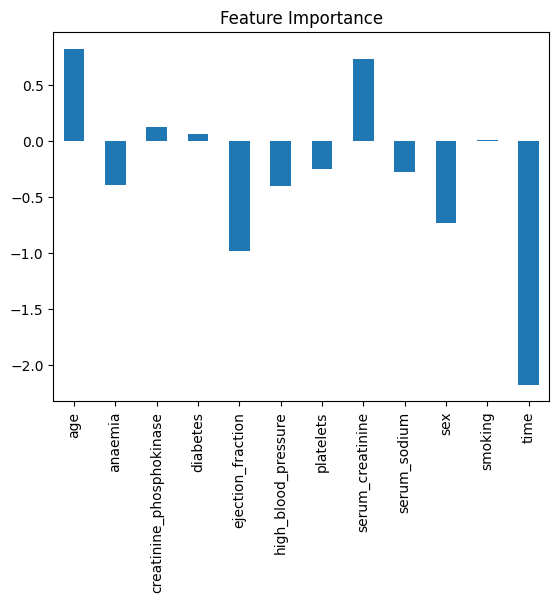

In [67]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

# **LDA hyper-tuning**

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution
param_dist = {
    'solver': ['lsqr', 'eigen'],
    # 'shrinkage' must be None when solver='svd'. Here we test None, 'auto', and various float values.
    'shrinkage': [None, 'auto'] + list(np.linspace(0, 1, 10))
}

# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    lda,
    param_distributions=param_dist,
    n_iter=20,            # number of parameter settings sampled
    scoring='roc_auc',    # you can change this to another metric if desired
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit the search on the training data
random_search.fit(X_train_bal_scaled, y_train_bal.values.ravel())

# Print best parameters and best score from the search
print("Best parameters found:", random_search.best_params_)
print("Best ROC AUC score on training set:", random_search.best_score_)

# Evaluate the best estimator on the validation set
best_lda = random_search.best_estimator_
y_pred_lda_best = best_lda.predict(X_val_bal_scaled)
acc_lda_best = accuracy_score(y_val_bal, y_pred_lda_best)
precision_lda_best = precision_score(y_val_bal, y_pred_lda_best)
recall_lda_best = recall_score(y_val_bal, y_pred_lda_best)
roc_auc_lda_best = roc_auc_score(y_val_bal, best_lda.predict_proba(X_val_bal_scaled)[:, 1])

print("\n----- Best LDA on Validation Set -----")
print(f"Accuracy       : {acc_lda_best:.4f}")
print(f"Precision      : {precision_lda_best:.4f}")
print(f"Recall         : {recall_lda_best:.4f}")
print(f"ROC AUC        : {roc_auc_lda_best:.4f}")


Best parameters found: {'solver': 'lsqr', 'shrinkage': 'auto'}
Best ROC AUC score on training set: 0.920794871794872

----- Best LDA on Validation Set -----
Accuracy       : 0.8810
Precision      : 0.8182
Recall         : 0.9474
ROC AUC        : 0.9508


# **Testing**

In [106]:
# Extract best hyperparameters from the search
best_params = random_search.best_params_

# Create a new LDA model using the best parameters
final_lda_model = LinearDiscriminantAnalysis(**best_params)

# Fit the final model on the training data
final_lda_model.fit(X_train_bal_scaled, y_train_bal.values.ravel())

# Optionally, evaluate the final model on the validation set
y_pred_final = final_lda_model.predict(X_test_scaled)

acc_final = accuracy_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, final_lda_model.predict_proba(X_test_scaled)[:, 1])

print("Final LDA Model Performance:")
print(f"Accuracy : {acc_final:.4f}")
print(f"ROC AUC  : {roc_auc_final:.4f}")


Final LDA Model Performance:
Accuracy : 0.7000
ROC AUC  : 0.8251


In [107]:
# Initialize and train LDA model
model_lda_1 = LinearDiscriminantAnalysis()
model_lda_1.fit(X_train_bal_scaled, y_train_bal.values.ravel())

# Fit the final model on the training data
model_lda_1.fit(X_train_bal_scaled, y_train_bal.values.ravel())

# Optionally, evaluate the final model on the validation set
y_pred_final = model_lda_1.predict(X_test_scaled)
acc_final = accuracy_score(y_test, y_pred_final)
roc_auc_final = roc_auc_score(y_test, model_lda_1.predict_proba(X_test_scaled)[:, 1])

print("Initial LDA Model Performance:")
print(f"Accuracy : {acc_final:.4f}")
print(f"ROC AUC  : {roc_auc_final:.4f}")


Initial LDA Model Performance:
Accuracy : 0.6667
ROC AUC  : 0.8126


In [105]:
# Import necessary libraries
import time
import tracemalloc
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_bal_scaled, y_train_bal.values.ravel())


# Evaluate Decision Tree on the validation set
y_pred_dt = model_dt.predict(X_test_scaled)


acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, model_dt.predict_proba(X_test_scaled)[:, 1])


print("Decision Tree Model Performance:")
print(f"Accuracy : {acc_dt:.4f}")
print(f"ROC AUC  : {roc_auc_dt:.4f}")


Decision Tree Model Performance:
Accuracy : 0.7167
ROC AUC  : 0.7286


In [104]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_bal_scaled, y_train_bal.values.ravel())

# Evaluate KNN on the validation set
y_pred_knn = model_knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, model_knn.predict_proba(X_test_scaled)[:, 1])

print("KNN Model Performance:")
print(f"Accuracy : {acc_knn:.4f}")
print(f"ROC AUC  : {roc_auc_knn:.4f}")


KNN Model Performance:
Accuracy : 0.6667
ROC AUC  : 0.7086
